In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv('data_boy_clean_all.csv', encoding='gbk')
df['BMI_等频分组'] = pd.qcut(df['孕妇BMI'], q=5, labels=False, duplicates='drop') # 等频分
df_sorted = df.sort_values(by='BMI_等频分组') # 排序
df_sorted['Y是否可检测'] = np.where(df_sorted['Y染色体浓度'] < 0.04, 0, 1)
x = df_sorted[['Y是否可检测', '检测孕周_周数', 'BMI_等频分组']]
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 创建Y是否可检测列
df_sorted['Y是否可检测'] = np.where(df_sorted['Y染色体浓度'] < 0.04, 0, 1)

# 为每个BMI分组计算身高、体重和年龄的中位数
group_medians = df_sorted.groupby('BMI_等频分组')[['身高', '体重', '年龄']].median()

# 将中位数添加到原始数据框中
for col in ['身高', '体重', '年龄']:
    df_sorted[f'{col}_组中位数'] = df_sorted.groupby('BMI_等频分组')[col].transform('median')

# 计算每个人与其组中位数的差值，中心化
df_sorted['身高_差值'] = df_sorted['身高'] - df_sorted['身高_组中位数']
df_sorted['体重_差值'] = df_sorted['体重'] - df_sorted['体重_组中位数']
df_sorted['年龄_差值'] = df_sorted['年龄'] - df_sorted['年龄_组中位数']

x = df_sorted[['Y是否可检测', '检测孕周_周数', 'BMI_等频分组', '身高_差值', '体重_差值', '年龄_差值']]
x

,Y是否可检测,检测孕周_周数,BMI_等频分组,身高_差值,体重_差值,年龄_差值
0,0,11.857143,0,0.0,-3.0,3.0
199,1,12.285714,0,8.0,5.0,0.0
200,1,16.714286,0,8.0,5.0,0.0
201,1,20.000000,0,8.0,7.0,0.0
202,1,23.857143,0,8.0,5.5,0.0
...,...,...,...,...,...,...
142,1,13.285714,4,0.0,2.0,-5.0
143,0,17.285714,4,0.0,1.5,-5.0
144,1,21.142857,4,0.0,3.6,-4.0
789,1,15.714286,4,1.0,-2.8,4.0



BMI分组: [0, 1, 2, 3, 4]

正在处理BMI分组 0...
分组 0 的样本量: 217
分组 0 的自变量描述统计:
          检测孕周_周数       身高_差值       体重_差值       年龄_差值
count  217.000000  217.000000  217.000000  217.000000
mean    15.888743    0.859447   -0.251106    0.788018
std      3.783709    5.535225    6.263863    3.179978
min     11.000000  -16.000000  -22.000000   -6.000000
25%     12.714286   -3.000000   -4.000000   -1.000000
50%     15.285714    0.000000    0.000000    0.000000
75%     17.571429    5.000000    5.000000    2.000000
max     26.000000   10.000000   10.900000   11.000000
Optimization terminated successfully.
         Current function value: 0.362681
         Iterations 6
已保存图表: solve_3_BMI分组_0_Logistic回归分析.png


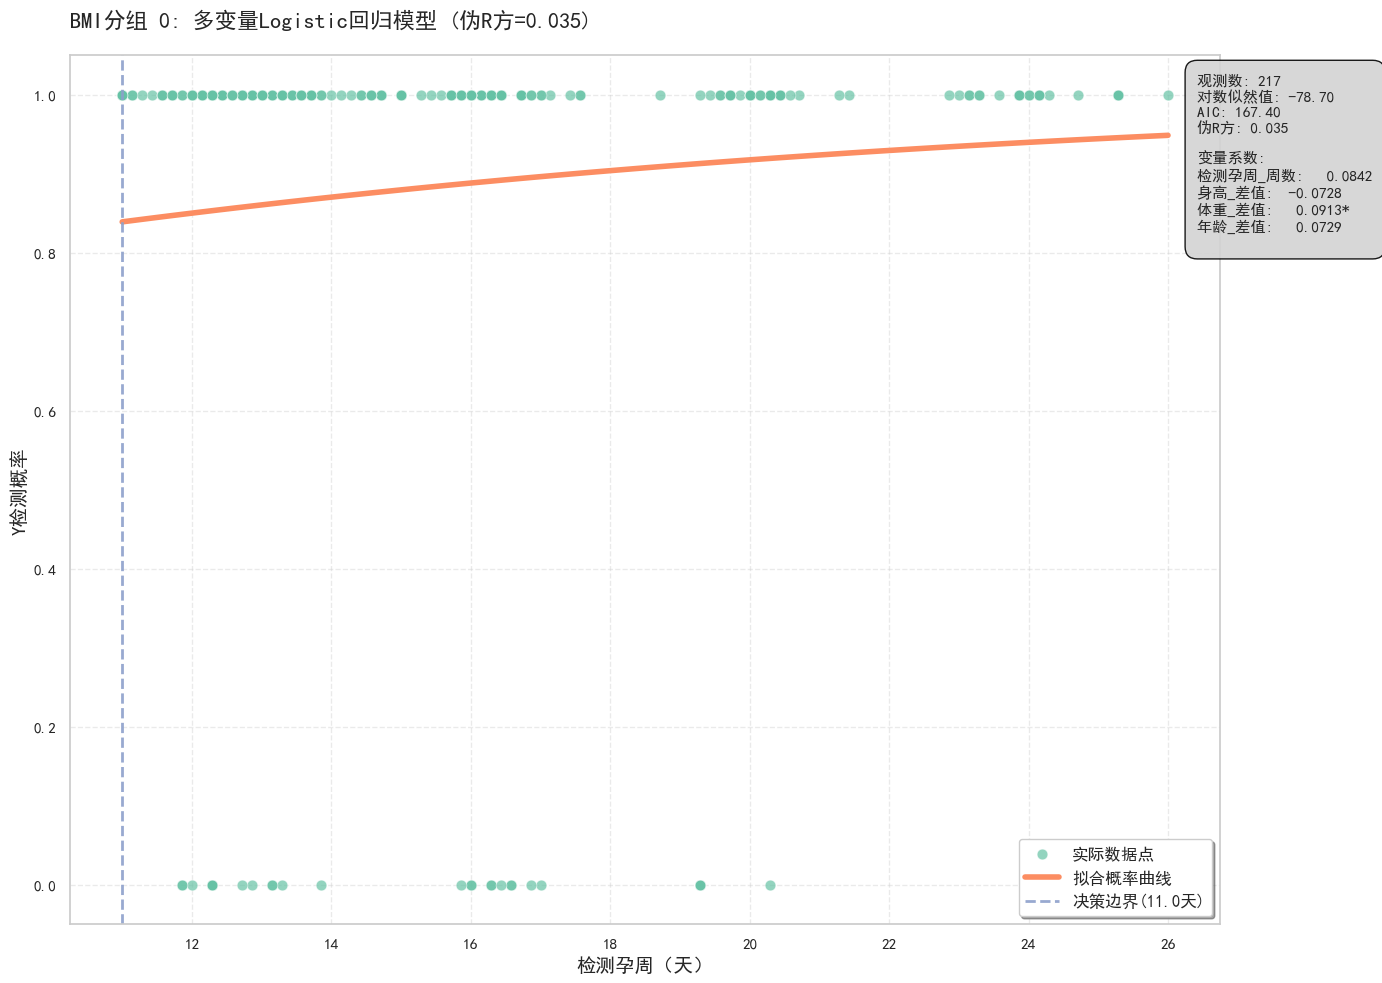


BMI分组 0 的多变量Logistic回归结果:
                           Logit Regression Results                           
Dep. Variable:                 Y是否可检测   No. Observations:                  217
Model:                          Logit   Df Residuals:                      212
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 Sep 2025   Pseudo R-squ.:                 0.03452
Time:                        08:07:39   Log-Likelihood:                -78.702
converged:                       True   LL-Null:                       -81.516
Covariance Type:            nonrobust   LLR p-value:                    0.2288
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7248      0.958      0.757      0.449      -1.153       2.602
检测孕周_周数        0.0842      0.062      1.347      0.178      -0.038       0.207
身高_差值         -0.0728    

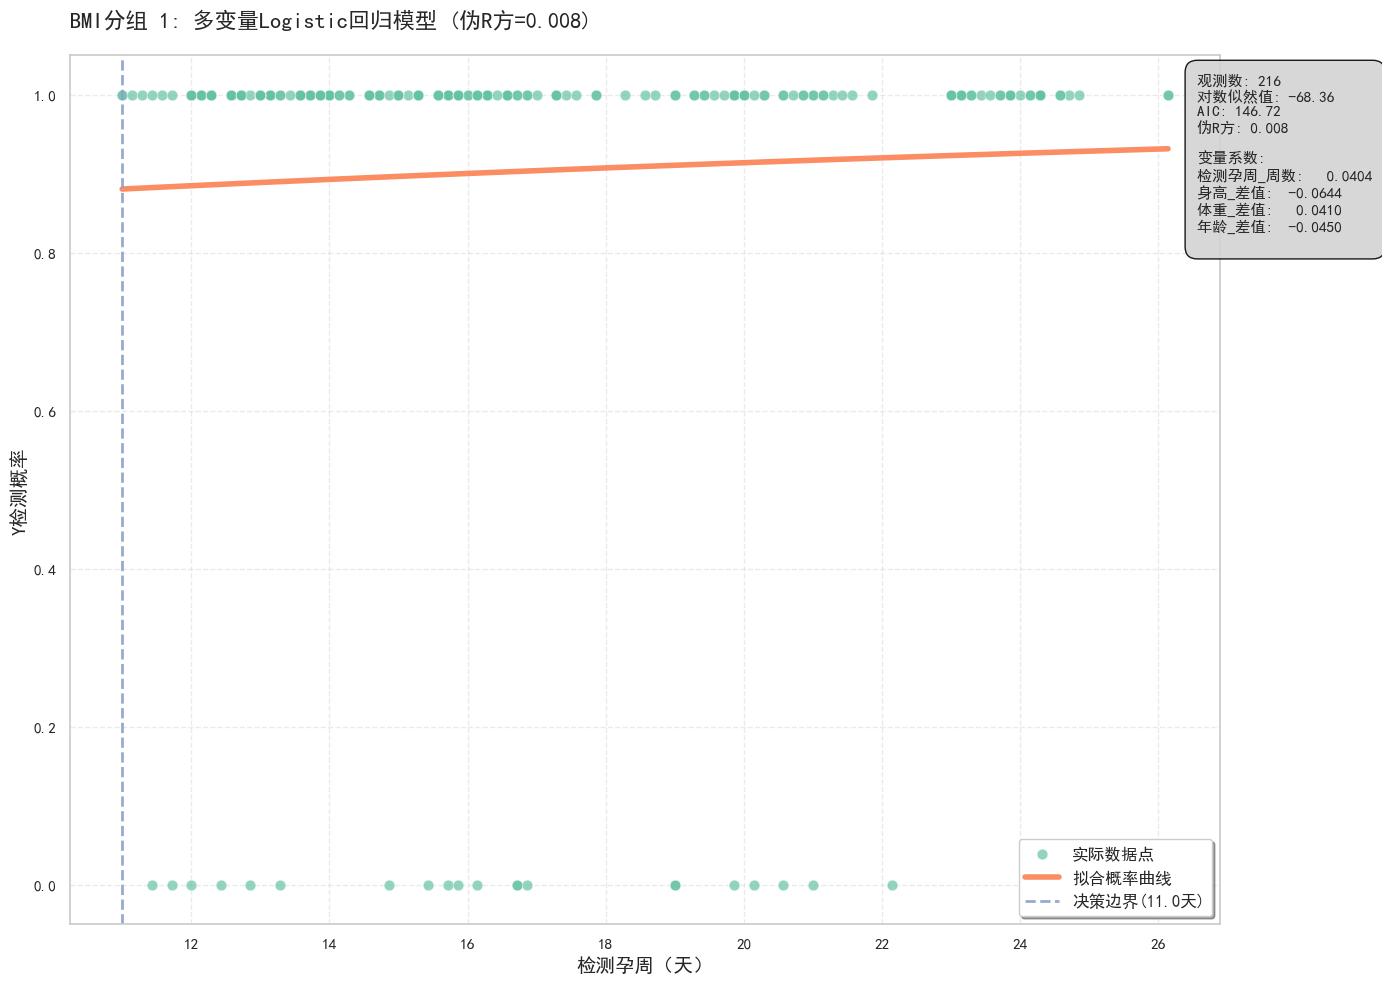


BMI分组 1 的多变量Logistic回归结果:
                           Logit Regression Results                           
Dep. Variable:                 Y是否可检测   No. Observations:                  216
Model:                          Logit   Df Residuals:                      211
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 Sep 2025   Pseudo R-squ.:                0.007690
Time:                        08:07:41   Log-Likelihood:                -68.360
converged:                       True   LL-Null:                       -68.890
Covariance Type:            nonrobust   LLR p-value:                    0.9006
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5526      1.022      1.519      0.129      -0.451       3.556
检测孕周_周数        0.0404      0.061      0.667      0.505      -0.078       0.159
身高_差值         -0.0644    

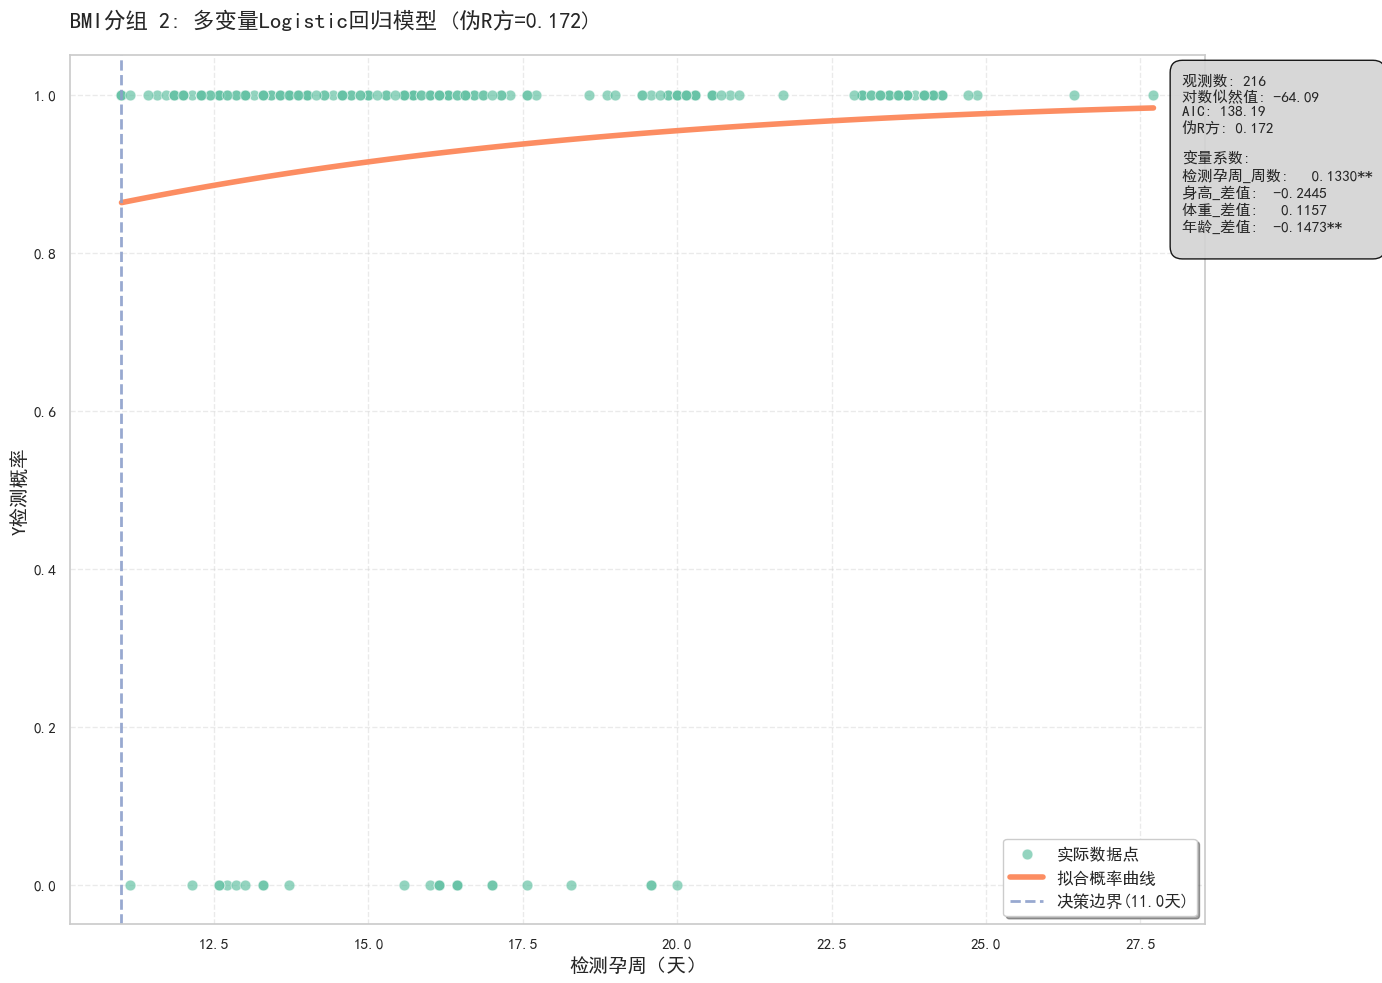


BMI分组 2 的多变量Logistic回归结果:
                           Logit Regression Results                           
Dep. Variable:                 Y是否可检测   No. Observations:                  216
Model:                          Logit   Df Residuals:                      211
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 Sep 2025   Pseudo R-squ.:                  0.1720
Time:                        08:07:43   Log-Likelihood:                -64.094
converged:                       True   LL-Null:                       -77.404
Covariance Type:            nonrobust   LLR p-value:                 2.372e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3799      1.043      0.364      0.716      -1.664       2.424
检测孕周_周数        0.1330      0.065      2.059      0.039       0.006       0.260
身高_差值         -0.2445    

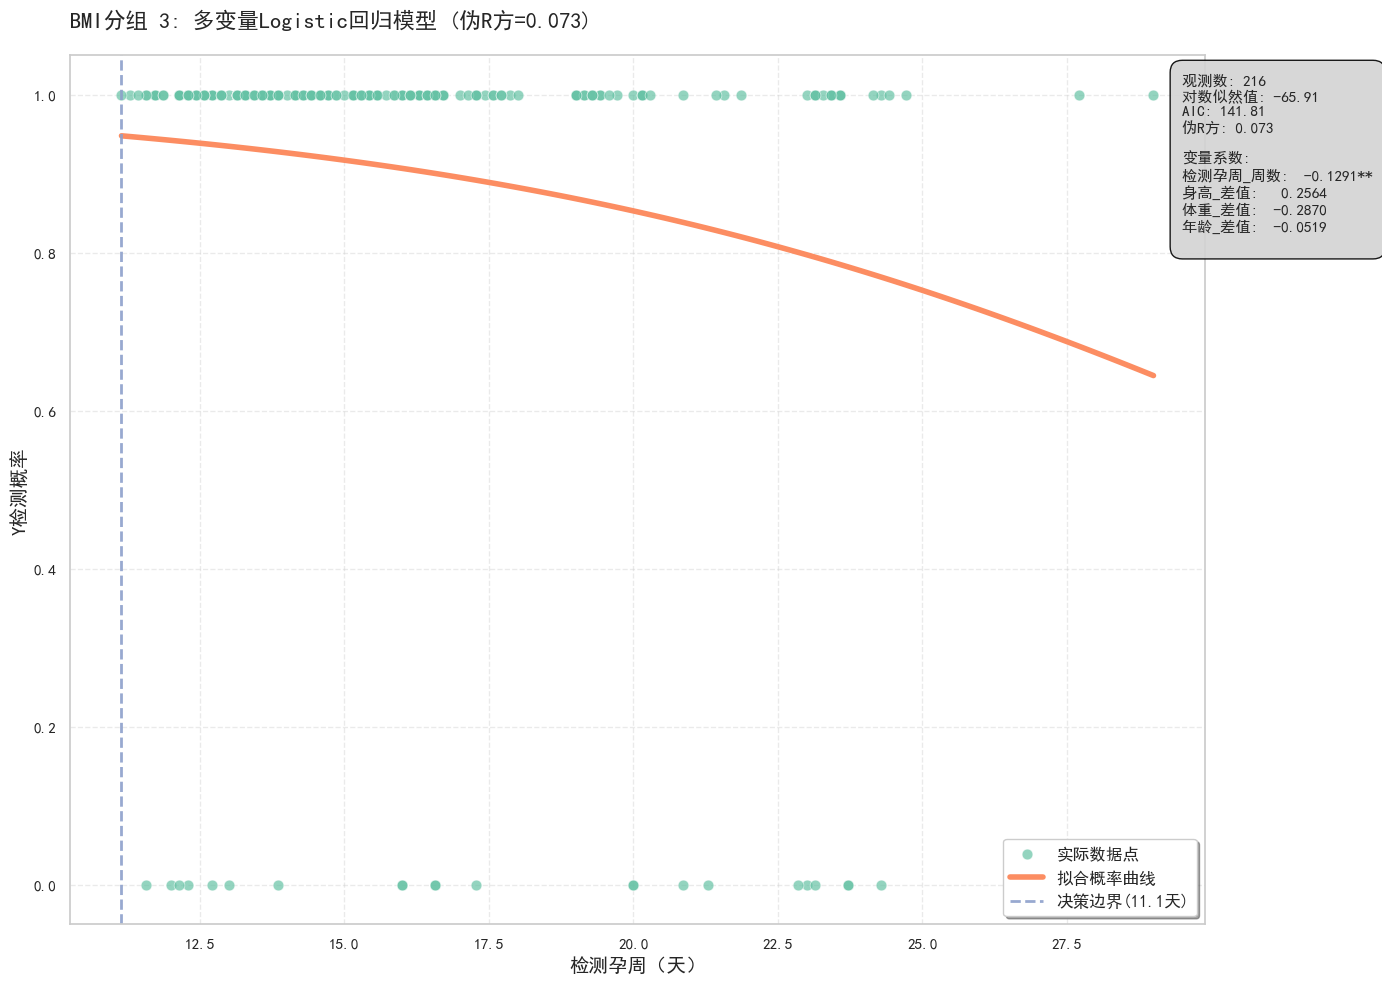


BMI分组 3 的多变量Logistic回归结果:
                           Logit Regression Results                           
Dep. Variable:                 Y是否可检测   No. Observations:                  216
Model:                          Logit   Df Residuals:                      211
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 Sep 2025   Pseudo R-squ.:                 0.07296
Time:                        08:07:45   Log-Likelihood:                -65.906
converged:                       True   LL-Null:                       -71.093
Covariance Type:            nonrobust   LLR p-value:                   0.03459
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3401      1.003      4.328      0.000       2.374       6.306
检测孕周_周数       -0.1291      0.056     -2.320      0.020      -0.238      -0.020
身高_差值          0.2564    

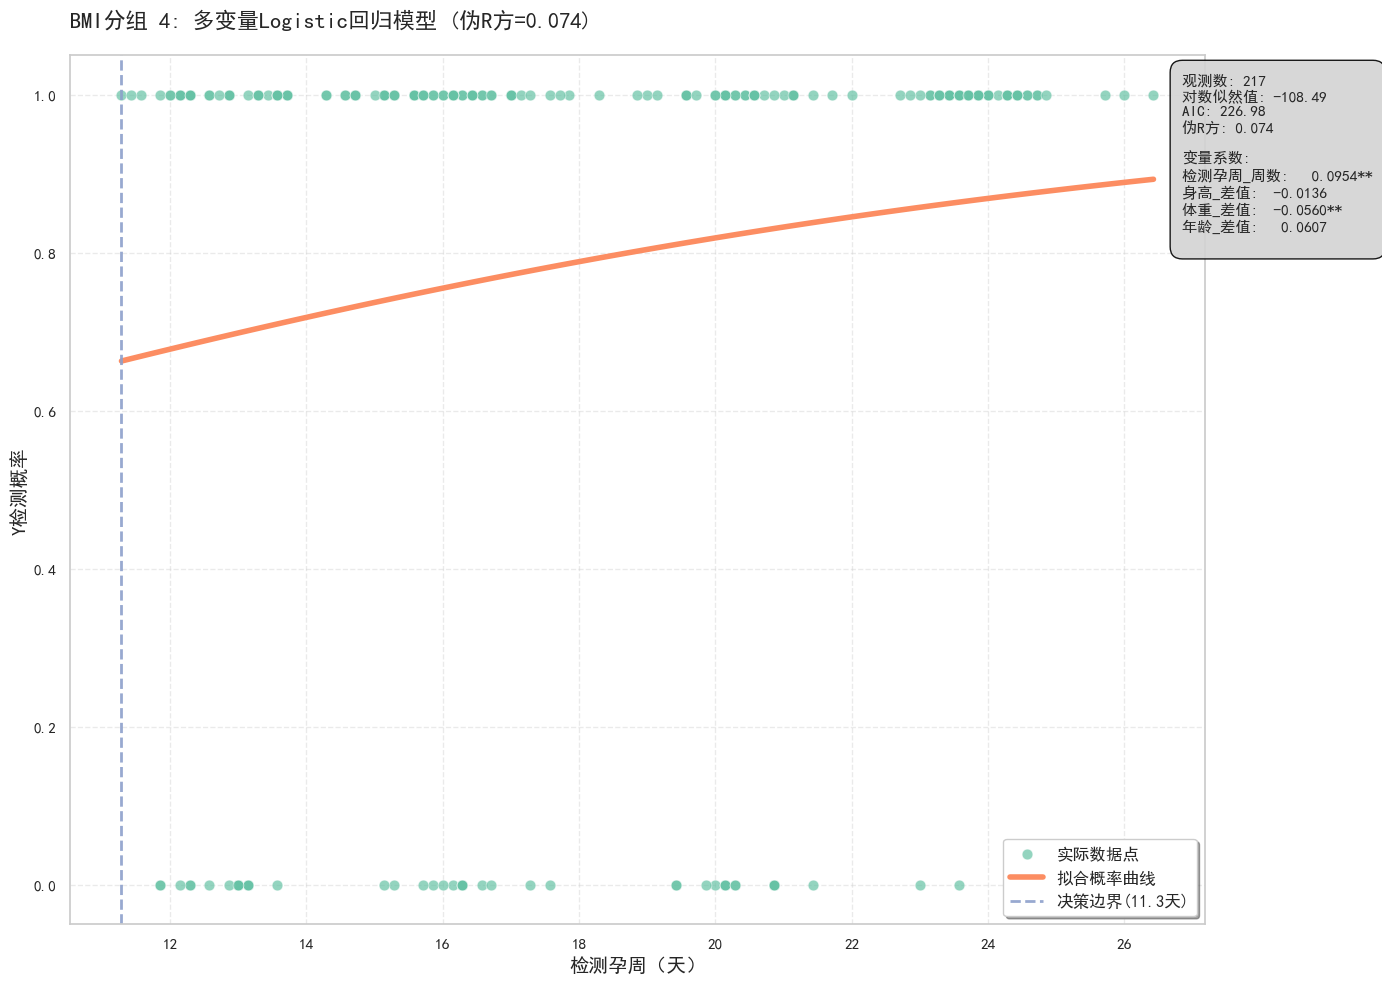


BMI分组 4 的多变量Logistic回归结果:
                           Logit Regression Results                           
Dep. Variable:                 Y是否可检测   No. Observations:                  217
Model:                          Logit   Df Residuals:                      212
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 Sep 2025   Pseudo R-squ.:                 0.07378
Time:                        08:07:47   Log-Likelihood:                -108.49
converged:                       True   LL-Null:                       -117.13
Covariance Type:            nonrobust   LLR p-value:                  0.001701
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4003      0.733     -0.546      0.585      -1.837       1.036
检测孕周_周数        0.0954      0.041      2.307      0.021       0.014       0.176
身高_差值         -0.0136    

C:\Users\33703\AppData\Local\Temp\ipykernel_49004\3026643373.py:138: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  '系数': result.params[i],
C:\Users\33703\AppData\Local\Temp\ipykernel_49004\3026643373.py:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'p值': result.pvalues[i]


已保存图表: solve_3_所有分组系数比较.png


<Figure size 1600x1200 with 0 Axes>

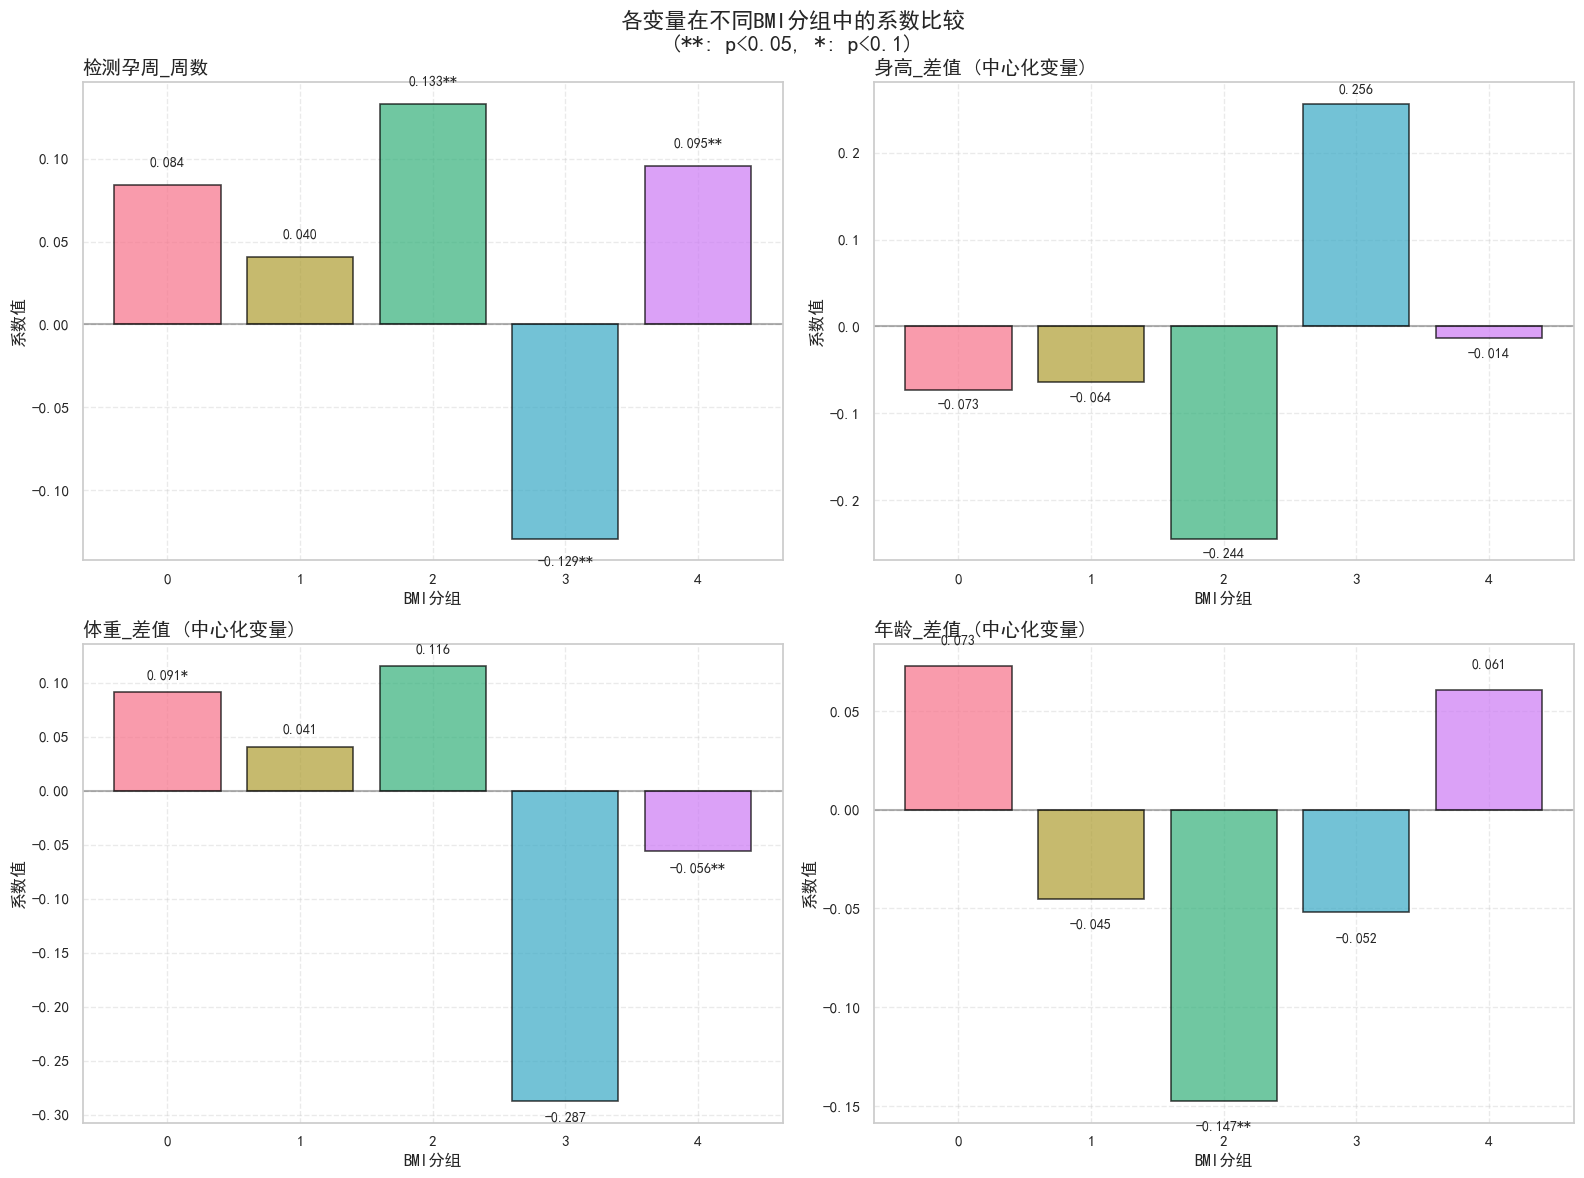

In [13]:
"""Logistic Regression """
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 设置Seaborn样式和上下文中文字体
sns.set_theme(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 获取唯一的BMI分组并排序
bmi_groups = sorted(df_sorted['BMI_等频分组'].unique())
print(f"\nBMI分组: {bmi_groups}")

# 存储每个组的模型结果
models = {}

# 为每个分组单独创建图表和模型
for group in bmi_groups:
    print(f"\n正在处理BMI分组 {group}...")

    # 为每个分组创建独立的图表
    plt.figure(figsize=(14, 10))

    # 提取当前分组的数据
    group_data = df_sorted[df_sorted['BMI_等频分组'] == group].copy()
    print(f"分组 {group} 的样本量: {len(group_data)}")

    # 准备自变量和因变量
    X_vars = group_data[['检测孕周_周数', '身高_差值', '体重_差值', '年龄_差值']]
    y_var = group_data['Y是否可检测']

    # 检查数据基本情况
    print(f"分组 {group} 的自变量描述统计:")
    print(X_vars.describe())

    # 添加常数项（截距）
    X_vars_with_const = sm.add_constant(X_vars)

    # 创建并拟合Logistic回归模型
    model = sm.Logit(y_var, X_vars_with_const)
    result = model.fit()
    models[group] = result

    # 生成预测概率的孕周范围
    week_range = np.linspace(X_vars['检测孕周_周数'].min(),
                            X_vars['检测孕周_周数'].max(), 100)

    # 创建预测数据集
    X_pred = pd.DataFrame({
        'const': 1,
        '检测孕周_周数': week_range,
        '身高_差值': 0,
        '体重_差值': 0,
        '年龄_差值': 0
    })

    y_pred = result.predict(X_pred)

    # 使用Seaborn颜色 palette
    colors = sns.color_palette("Set2", 3)

    # 绘制散点图和拟合曲线
    plt.scatter(group_data['检测孕周_周数'], group_data['Y是否可检测'],
               alpha=0.7, s=60, color=colors[0], edgecolors='white', linewidth=0.5, label='实际数据点')
    plt.plot(week_range, y_pred, color=colors[1], linewidth=4, label='拟合概率曲线')

    # 添加决策边界
    above_05_idx = np.where(y_pred >= 0.5)[0]
    if len(above_05_idx) > 0:
        decision_boundary = week_range[above_05_idx[0]]
        plt.axvline(x=decision_boundary, color=colors[2], linestyle='--', linewidth=2, alpha=0.9,
                   label=f'决策边界({decision_boundary:.1f}天)')

    # 设置图表标题和标签
    plt.xlabel('检测孕周（天）', fontsize=14, fontweight='bold')
    plt.ylabel('Y检测概率', fontsize=14, fontweight='bold')

    # 获取模型拟合优度
    pseudo_r2 = result.prsquared

    # 设置标题
    plt.title(f'BMI分组 {group}: 多变量Logistic回归模型 (伪R方={pseudo_r2:.3f})',
              fontsize=16, fontweight='bold', loc='left', pad=20)

    # 优化图例
    plt.legend(loc='lower right', fontsize=12, frameon=True, fancybox=True, shadow=True)

    # 优化网格
    plt.grid(True, alpha=0.4, linestyle='--')

    # 添加模型信息文本框
    model_text = f'观测数: {len(group_data)}\n'
    model_text += f'对数似然值: {result.llf:.2f}\n'
    model_text += f'AIC: {result.aic:.2f}\n'
    model_text += f'伪R方: {result.prsquared:.3f}\n'

    model_text += '\n变量系数:\n'
    for var, coef, pval in zip(X_vars_with_const.columns, result.params, result.pvalues):
        significance = "**" if pval < 0.05 else "*" if pval < 0.1 else ""
        if var != 'const':
            model_text += f'{var}: {coef:>8.4f}{significance}\n'

    plt.text(0.98, 0.98, model_text, transform=plt.gca().transAxes, fontsize=11,
             verticalalignment='top', horizontalalignment='left',
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.9,
                       edgecolor='black', pad=0.8))

    plt.tight_layout()

    # 保存当前分组的图表 (600 DPI)
    filename = f'solve_3_BMI分组_{group}_Logistic回归分析.png'
    plt.savefig(filename, dpi=600, bbox_inches='tight')
    print(f"已保存图表: {filename}")

    plt.show()

    # 打印模型摘要
    print(f"\nBMI分组 {group} 的多变量Logistic回归结果:")
    print("=" * 60)
    print(result.summary())

# 创建系数比较图
coefficient_data = []

# 遍历每个BMI分组，提取模型系数和p值
for group in bmi_groups:
    result = models[group]

    for i, var in enumerate(result.params.index):
        if var != 'const':
            coefficient_data.append({
                '分组': group,
                '变量': var,
                '系数': result.params[i],
                'p值': result.pvalues[i]
            })

# 将列表转换为DataFrame
coef_df = pd.DataFrame(coefficient_data)

# 绘制系数比较图
plt.figure(figsize=(16, 12))
variables = coef_df['变量'].unique()

# 创建2x2的子图布局
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# 使用Seaborn调色板
colors = sns.color_palette("husl", len(bmi_groups))

for i, var in enumerate(variables):
    if i < len(axes):
        ax = axes[i]
        var_data = coef_df[coef_df['变量'] == var]

        # 绘制系数值
        bars = ax.bar([str(g) for g in var_data['分组']], var_data['系数'],
                     color=colors, alpha=0.7, edgecolor='black', linewidth=1.2)

        # 添加数值标签和显著性标记
        for bar, (coef, pval) in zip(bars, zip(var_data['系数'], var_data['p值'])):
            height = bar.get_height()
            label = f'{coef:.3f}'
            if pval < 0.05:
                label += '**'
            elif pval < 0.1:
                label += '*'

            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01*np.sign(height),
                    label, ha='center', va='bottom' if coef >= 0 else 'top', fontsize=10, fontweight='bold')

        ax.set_xlabel('BMI分组', fontsize=12, fontweight='bold')
        ax.set_ylabel('系数值', fontsize=12, fontweight='bold')

        title_suffix = " (中心化变量)" if "差值" in var else ""
        ax.set_title(f'{var}{title_suffix}', fontsize=14, fontweight='bold', loc='left')

        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        ax.grid(True, alpha=0.4, linestyle='--')

plt.tight_layout()
plt.suptitle('各变量在不同BMI分组中的系数比较\n(**: p<0.05, *: p<0.1)', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.92)

# 保存系数比较图 (600 DPI)
filename = 'solve_3_所有分组系数比较.png'
plt.savefig(filename, dpi=600, bbox_inches='tight')
print(f"已保存图表: {filename}")

plt.show()

各分组最佳检测时点计算结果:
分组 0:
  参数: α=0.7248, β=0.0842
  最佳检测时点: 84.00000 天 (12.00000 周)
  此时达标概率: 0.9996
  最小综合损失: 3.2844
  计算方法: Brent

分组 1:
  参数: α=1.5526, β=0.0404
  最佳检测时点: 121.67617 天 (17.38231 周)
  此时达标概率: 0.9985
  最小综合损失: 31.2335
  计算方法: Brent

分组 2:
  参数: α=0.3799, β=0.1330
  最佳检测时点: 84.00000 天 (12.00000 周)
  此时达标概率: 1.0000
  最小综合损失: 0.0769
  计算方法: Brent

分组 3:
  参数: α=4.3401, β=-0.1291
  最佳检测时点: 70.00000 天 (10.00000 周)
  此时达标概率: 0.0090
  最小综合损失: 7927.6718
  计算方法: 边界检查

分组 4:
  参数: α=-0.4003, β=0.0954
  最佳检测时点: 84.00000 天 (12.00000 周)
  此时达标概率: 0.9995
  最小综合损失: 3.9488
  计算方法: Brent

已保存图表: solve_3_BMI分组_0_损失函数曲线.png


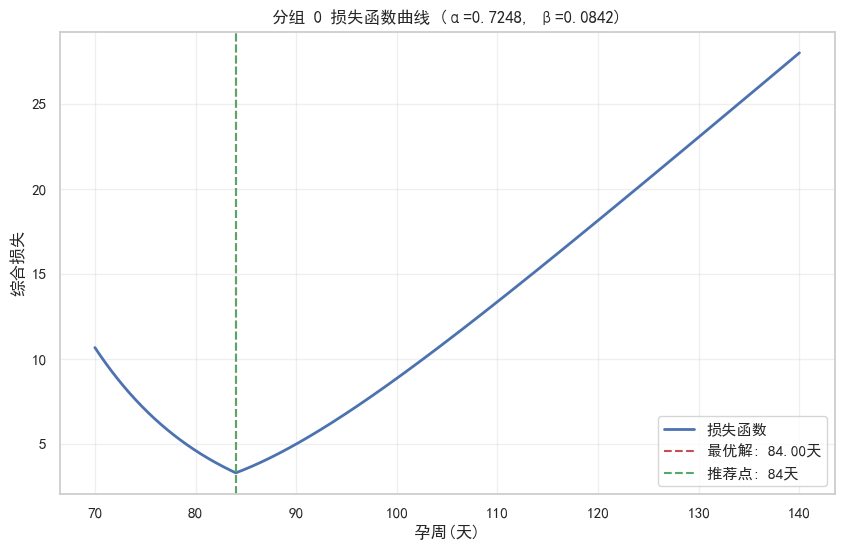

已保存图表: solve_3_BMI分组_1_损失函数曲线.png


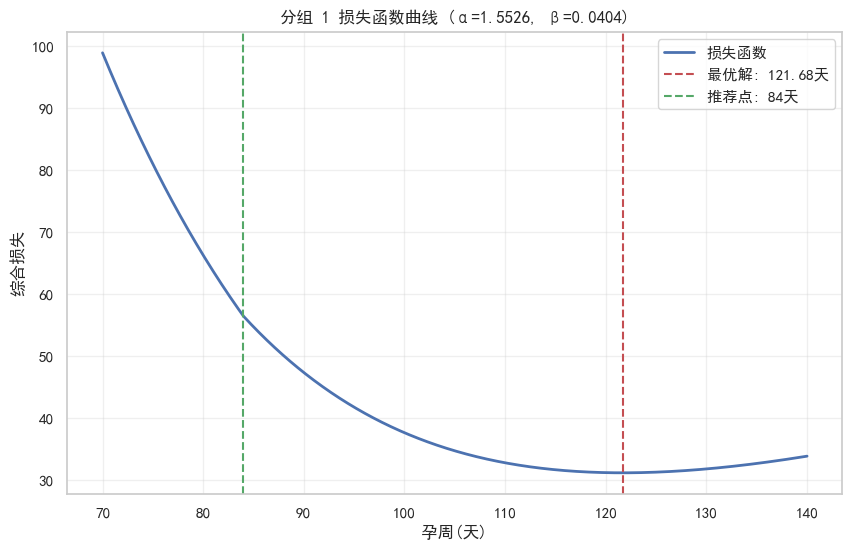

已保存图表: solve_3_BMI分组_2_损失函数曲线.png


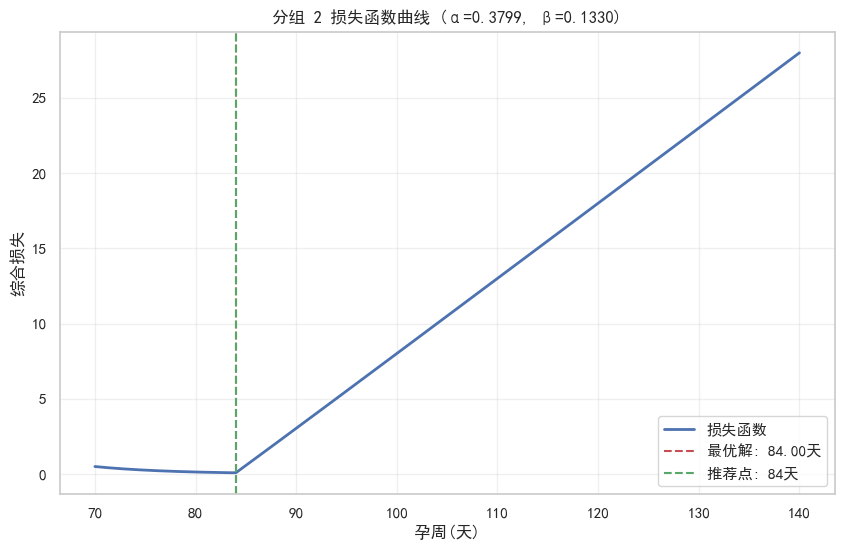

已保存图表: solve_3_BMI分组_3_损失函数曲线.png


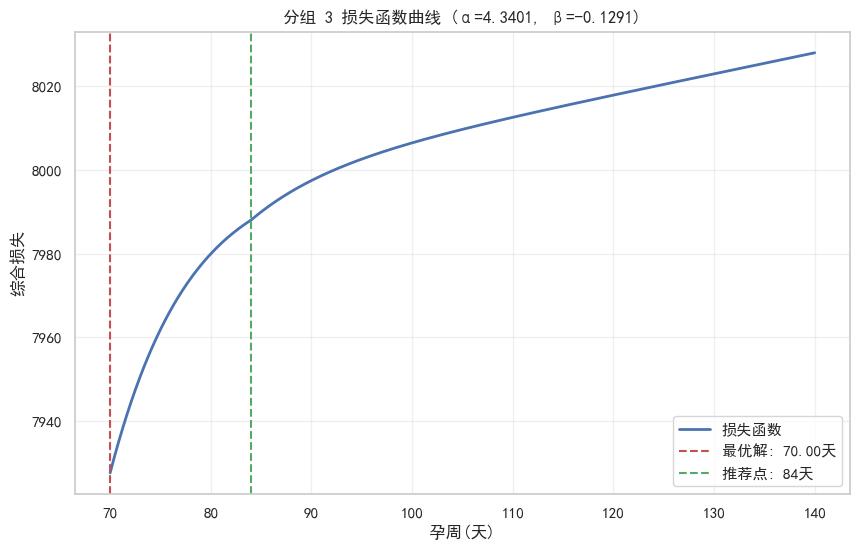

已保存图表: solve_3_BMI分组_4_损失函数曲线.png


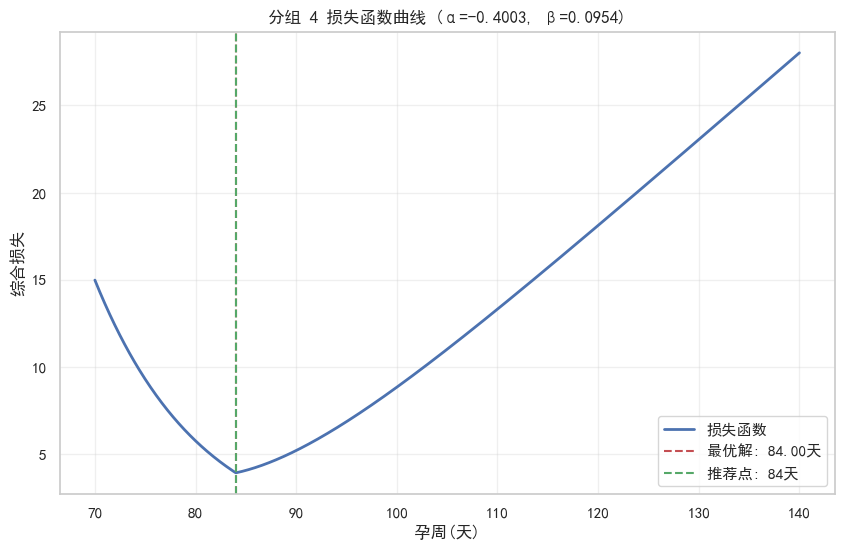

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, differential_evolution

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 定义概率函数 p_j(t)（数值稳定版本）
def probability_function(t, alpha, beta):
    z = alpha + beta * t
    if z < -500:
        return 0.0
    elif z > 500:
        return 1.0
    else:
        return 1 / (1 + np.exp(-z))

# 定义未达标风险函数 r_j(t)
def risk_function(t, alpha, beta):
    return 1 - probability_function(t, alpha, beta)

# 定义检测延迟函数 d(t)
def delay_function(t, t0=84):
    return np.maximum(0, t - t0)

# 定义综合损失函数 L_j(t)
def loss_function(t, alpha, beta, w_u, w_d, t0=84):
    risk = risk_function(t, alpha, beta)
    delay = delay_function(t, t0)
    return w_u * risk + w_d * delay

# 设置权重参数
w_u = 8000 # 为了让时间的占比与概率的权重一致，将权重设为8000
w_d = 0.5
t0 = 84
t_min = 70
t_max = 140

# 根据您提供的多变量Logistic回归结果更新参数
params = {
    0: (0.7248, 0.0842),   # 分组0: const=0.7248, 检测孕周_周数=0.0842
    1: (1.5526, 0.0404),   # 分组1: const=1.5526, 检测孕周_周数=0.0404
    2: (0.3799, 0.1330),   # 分组2: const=0.3799, 检测孕周_周数=0.1330
    3: (4.3401, -0.1291),  # 分组3: const=4.3401, 检测孕周_周数=-0.1291
    4: (-0.4003, 0.0954)    # 分组4: const=-0.4003, 检测孕周_周数=0.0954
}

# 计算最佳检测时点（改进版本）
best_times = {}
optimization_methods = {}

for group, (alpha, beta) in params.items():
    def loss_to_minimize(t):
        return loss_function(t, alpha, beta, w_u, w_d, t0)

    if beta < 0:
        # β<0时，最优解通常在边界，直接检查边界和t0
        t_candidates = [t_min, t0]
        losses = [loss_to_minimize(t) for t in t_candidates]
        best_idx = np.argmin(losses)
        best_times[group] = t_candidates[best_idx]
        optimization_methods[group] = '边界检查'
    else:
        # β>0时，使用更适合全局优化的方法
        try:
            # 尝试使用Brent方法
            result = minimize_scalar(
                loss_to_minimize,
                bounds=(t_min, t_max),
                method='bounded',
                options={'xatol': 1e-8, 'maxiter': 1000}
            )
            if result.success:
                best_times[group] = result.x
                optimization_methods[group] = 'Brent'
            else:
                # 如果失败，使用差分进化算法
                result = differential_evolution(
                    loss_to_minimize,
                    bounds=[(t_min, t_max)],
                    strategy='best1bin',
                    popsize=15,
                    tol=1e-8,
                    mutation=(0.5, 1),
                    recombination=0.7
                )
                best_times[group] = result.x[0]
                optimization_methods[group] = '差分进化'
        except:
            # 最后备选方案：精细网格搜索
            t_values = np.linspace(t_min, t_max, 5000)
            loss_values = [loss_to_minimize(t) for t in t_values]
            best_idx = np.argmin(loss_values)
            best_times[group] = t_values[best_idx]
            optimization_methods[group] = '精细网格搜索'

# 输出结果
print("各分组最佳检测时点计算结果:")
for group in best_times:
    alpha, beta = params[group]
    best_t = best_times[group]
    best_prob = probability_function(best_t, alpha, beta)
    best_loss = loss_function(best_t, alpha, beta, w_u, w_d, t0)
    method = optimization_methods.get(group, '未知')

    print(f"分组 {group}:")
    print(f"  参数: α={alpha:.4f}, β={beta:.4f}")
    print(f"  最佳检测时点: {best_t:.5f} 天 ({best_t/7:.5f} 周)")
    print(f"  此时达标概率: {best_prob:.4f}")
    print(f"  最小综合损失: {best_loss:.4f}")
    print(f"  计算方法: {method}")
    print()

# 可视化验证
for group, (alpha, beta) in params.items():
    best_t = best_times[group]

    t_values = np.linspace(t_min, t_max, 1000)
    loss_values = [loss_function(t, alpha, beta, w_u, w_d, t0) for t in t_values]

    plt.figure(figsize=(10, 6))
    plt.plot(t_values, loss_values, label='损失函数', linewidth=2)
    plt.axvline(x=best_t, color='r', linestyle='--', label=f'最优解: {best_t:.2f}天')
    plt.axvline(x=t0, color='g', linestyle='--', label=f'推荐点: {t0}天')
    plt.xlabel('孕周(天)')
    plt.ylabel('综合损失')
    plt.title(f'分组 {group} 损失函数曲线 (α={alpha:.4f}, β={beta:.4f})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    # 保存图表到当前目录 (600 DPI)
    filename = f'solve_3_BMI分组_{group}_损失函数曲线.png'
    plt.savefig(filename, dpi=600, bbox_inches='tight')
    print(f"已保存图表: {filename}")
    plt.show()